In [2]:
import numpy as np

y = h(x1,x2) = T0 + T1.x1 + T2.x2 

In [3]:
def funcao_custo(Theta, X, Y):
    custo = 0
    m = len(X)
    
    for i in range(m):
        hi = Theta[0] + Theta[1]*X[i][0] + Theta[2]*X[i][1]
        yi = Y[i]
        
        temp = (hi - yi)**2
        
        custo += temp
        
    custo = custo/(2*m)
    
    return custo

In [4]:
def gradienteDescendente(Theta, X, Y, alpha):
    m = len(X)
    
    for _ in range(15000):
        Sum0, Sum1 = 0,0
        
        for i in range(m):
            hi = Theta[0] + Theta[1]*X[i][0]
            yi = Y[i]
            
            temp = (hi - yi)
            
            Sum0 += temp*1
            Sum1 += temp*X[i][0]
                
        Theta[0] = Theta[0] - alpha*Sum0/m
        Theta[1] = Theta[1] - alpha*Sum1/m
        
    return Theta

In [5]:
import pandas as pd
def Dados(caminho, norm = True):
    X = pd.read_csv(caminho, sep = '\\s+', header = None)
    if(norm):
        X = (X-X.min())/(X.max()-X.min()) # Min-Max\n",
    return X.values

In [6]:
Data = Dados('kick2.dat', norm = True)

y(t) = t <br>
x(t) = a + b.t <br>
z(t) = c + d.t <br>

## X(t)

In [7]:
X = Data[:,0]
T = [Data[:,1]]
Theta = [0,1]

In [8]:
alpha = 0.01
gradienteDescendente(Theta, T, X, alpha)

[0.0, 1.0]

x(t) = 0.5 + 0.5t
## Z(t)

In [9]:
X = Data[:,2]
T = [Data[:,1]]
Theta = [0,0]

In [10]:
alpha = 0.01
gradienteDescendente(Theta, T, X, alpha)

[0.0, 0.0]

z(t) = 0.45 + 0.45t

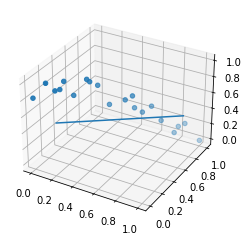

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection = '3d')

t = np.array(Data[:,1])
x = 0.215 + 0.626*t
y = t
z = 0.6 - 0.34*t

ax.plot(x,y,z)
ax.scatter3D(Data[:,0], Data[:,1], Data[:,2], cmap='Greens');
plt.show()

In [13]:

from sklearn.linear_model import LinearRegression
x = Data[:,2].reshape((-1, 1))
y = Data[:,0]

model = LinearRegression()
model.fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.0227847636602716
slope: [-0.89273925]


In [42]:

# notice small alpha value
alpha = 0.1
iters = 1000

# theta is a row vector
theta = np.array([[0, 0]])

def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        # if i % 10 == 0: # just look at cost every ten loops for debugging
        #     print(cost)
    return (theta, cost)

x = Data[:,0].reshape((-1, 1))
ones = np.ones([x.shape[0], 1])
x = np.concatenate([ones, x],1)

y = Data[:,1].reshape((-1, 1))
g, cost = gradientDescent(x, y, theta, 0.01, 1000)  
print(g, cost)

[[0.2156638  0.62631287]] 0.008302829617504111
